In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data = pd.read_csv('Marks_According_to_hour_studied_LOG.csv')
data

,Hour_Studied,Test_Grade
0,2,F
1,3,F
2,4,F
3,5,P
4,6,P
5,7,F
6,8,P
7,9,P
8,10,P
9,0,F


In [3]:
lb = LabelBinarizer()
data["Test_Grade"] = lb.fit_transform(data.Test_Grade)
data

,Hour_Studied,Test_Grade
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
5,7,0
6,8,1
7,9,1
8,10,1
9,0,0


In [4]:
lr1 = LogisticRegression()
data['intercept'] = 1
independent_variables = ["Hour_Studied","intercept"]

In [5]:
x = data[independent_variables]
y = data["Test_Grade"]


In [6]:
lr1.fit(x,y)
lr1.score(x,y)

0.8333333333333334

In [7]:
lr1.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=15)


In [20]:
lr2 = LogisticRegression()
lr2.fit(train_x,train_y)
pred = lr2.predict(x)
lr2.score(x,y)

0.8333333333333334

In [21]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
confusion_matrix(y,pred)

array([[5, 1],
       [1, 5]], dtype=int64)

In [22]:
fpr, tpr, _ = roc_curve(y, lr2.predict_proba(x)[:,1])


In [23]:
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.94


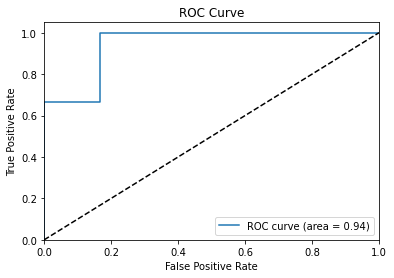

In [24]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()